# Tworzenie klasyfikatora i testowanie go metodą Train&Test

Jedną z najstarszych jak również najważniejszych metod eksploracji danych, która ma bardzo istotne znaczenie praktyczne jest metoda klasyfikacji. Polega ona na znajdowaniu odwzorowania danych w zbiór predefiniowanych klas. Na podstawie zawartości bazy danych budowany jest model (np. drzewo decyzyjne, sieć neuronowa i wiele innych), który służy do klasyfikowania nowych obiektów w bazie danych lub głębszego zrozumienia istniejącego podziału obiektów na predefiniowane klasy. Klasyfikacja jest metodą eksploracji danych z nadzorem (z nauczycielem). Proces klasyfikacji składa się z kilku etapów. Na początku odbywa się budowanie modelu zwanego klasyfikatorem, po czym następuje faza testowania klasyfikatora oraz predykcji nieznanych wartośc
i. Danymi wejściowymi w procesie klasyfikacji jest treningowy zbiór obiektów (przykładów, wierszy, obserwacji, próbek), opisanych za pomocą wartości atrybutów warunkowych i wybranego atrybutu decyzyjnego. Wynikiem procesu klasyfikacji jest pewien otrzymany model (klasyfikator), który przydziela każdemu obiektowi testowemu (krotce, przykładowi) wartość atrybutu decyzyjnego w oparciu o wartości atrybutów warunkowych.

W pierwszych przykładach konstruujemy klasyfikatory **metodą k-NN**, która mając obiekt testowy u o nieznanej klasie docelowej, najpierw ustala k najbliższych obiektów do u (nazywanych *sąsiadami* u) na podstawie pewnej miary odległości (na przykład euklidesowej). Następnie te k obserwacji „głosuje” na podstawie swojej klasy,
a klasa wygrywająca staje się prognozowaną klasą dla u.

Pozostałe dwa główne klasyfikatory na tym przedmiocie to klasyfikator oparty na **drzewie decyzyjnym** oraz **naiwy klasyfikator bayesowski** (patrz dalej). 

# Tworzenie klasyfikatora i testowanie go metodą Train&Test

Metoda Train&Test jest naprostrzym podejściem do testowania klasyfikatora i polega na losowy 
podziale zbioru danych na dwie części z zachowaniem jakiejś proporcji pomiędzy nimi. Pierwsza z tych części
nosi nazwę części (tablicy) treningowej, a druga część nosi nazwę części (tablicy) testowej. Proporcja podziału to często 50% na część treningową i 50% na część testową, 60% na część treningową i 40% na część testową lub 70% na część treningową i 30% na część testową. Metoda Train&Test może być stosowana dla danych liczących co najmniej 1000 obiektów.

In [2]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych

noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli parametr nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.4, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#Parametry tworzenia klasyfikatora
myNoNeighbors = 5 #Liczba sąsiadów
myMetric = 'euclidean' #Rodzaje odległości: 'euclidean', 'manhattan', 'minkowski'

#Utworzenie obiektu przykładowego modelu klasyfikatora (k-NN)
model = KNeighborsClassifier(n_neighbors=myNoNeighbors,metric=myMetric) 
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 


#Objaśnienia do miar oceny klasyfikatora wypisywanych niżej:
# accuracy - dokładność klasyfikacji (liczba obiektów dobrze sklasyfikowanych / liczba wszystkich obiektów)
# precision - liczba obiektów dobrze sklasyf. z danej klasy / liczba wszystkich obiektów sklasyf. do danej klasy 
# recall - liczba obiektów dobrze sklasyfikowanych z danej klasy / liczba wszystkich obiektów z danej klasy  
# f1-score - średnia ważona precision i recall obliczana według wzoru: f1' - 2 * (precision * recall) / (precision + recall)
# support - liczba obiektów należących do danej klasy decyzyjnej

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) =========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Dokładnośc klasyfikacji= 0.6481481481481481
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.67      0.72      0.69        60
           2       0.61      0.56      0.59        48

    accuracy                           0.65       108
   macro avg       0.64      0.64      0.64       108
weighted avg       0.65      0.65      0.65       108

====== MACIERZ POMYŁEK (confusion matrix) =========
[[43 17]
 [21 27]]


noColumn= 14
Wartosci atrybutu decyzyjnego w tablicy testowej:
1    27
2    27
Name: diagnoza, dtype: int64
[[17 10]
 [11 16]]


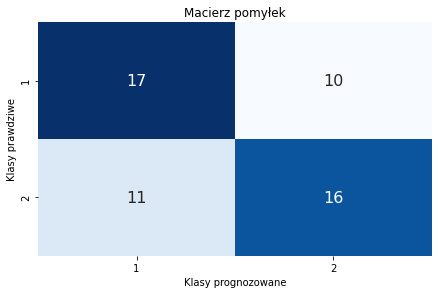

In [12]:
#To co wyżej, ale z wizualizacją macierzy pomyłek

#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych

noColumn = dataset.shape[1]
print("noColumn=",noColumn)

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.2, random_state=1234)
features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


decValues = labels_test['diagnoza'].value_counts()
print("Wartosci atrybutu decyzyjnego w tablicy testowej:")
print(decValues)

#Parametry tworzenia klasyfikatora
myNoNeighbors = 5 #Liczba sąsiadów
myMetric = 'euclidean' #Rodaje odległości: 'minkowski', 'euclidean', 'manhattan'

#Utworzenie obiektu przykładowego modelu klasyfikatora (k-NN)
model = KNeighborsClassifier(n_neighbors=myNoNeighbors,metric=myMetric) 
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test)


#Pozyskiwanie wartości decyzji
class_names_ordered = sorted(np.unique(labels_train))
my_class_names = []
for i in range(0,len(class_names_ordered)):
    my_class_names.append(str(class_names_ordered[i]))

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

dataframe = pd.DataFrame(conf_matrix, index=my_class_names, columns=my_class_names)
sns.heatmap(dataframe, annot=True, cbar=None, annot_kws={"size": 16}, cmap="Blues")
plt.title("Macierz pomyłek"), 
plt.tight_layout()
plt.ylabel("Klasy prawdziwe"), 
plt.xlabel("Klasy prognozowane")
plt.show()



In [ ]:
#Zad 1. Napisz program który odczytuje tablicę danych rezygnacje.csv oraz wybiera z niej wszystkie wiersze oraz
#kolumny: CZAS_POSIADANIA, PLAN_MIEDZY, POCZTA_G, L_WIAD_POCZTA_G, L_POL_BIURO, REZYGN. 
#Następnie wykonuje szereg eksperymentów z tworzeniem klasyfikatorów i testowaniem ich metodą Train&Test, przy czym 
#jest to zawsze klasyfikator k-NN (te same parametry tworzenia) występujący w powyższych 2 przykładach przy 
#atrybucie decyzyjnym 'REZYGN'. Eksperymenty są wykonywane przy następującyh wielkościach tablicy 
#treningowej: 90%, 80%, 70%, 60%, 50%, 40%, 30%, 20% i 10%. 
#Oczywiście, jeśli np. tablica treningowa liczy 70% całych danych, to tablica testowa liczy 100% - 70% = 30%.
#Wykonać wykres porównujący jakości klasyfikacji (accuracy) dla wszystkich eksperymemntów i wyciągnąć wniosek 
#czy i jak proporcja podziału danych ma wpływ na jakośc klasyfikacji. Odpowiedni wniosek zapisać słownie 
#w komentarzu na końcu komórki z rozwiązaniem.


# Testowanie klasyfikatora metodą  cross-validation

Innym sposobem testowania klasyfikatora, szczególnie przydatnym jeśli sformułowaniu problemu klasyfikacyjnego nie towarzyszy naturalny podział na próbki treningowe i testowe, jest walidacja krzyżowa (ang. cross-validation). Przy danym parametrze n (który na ogół ustawiany jest jako 5 lub 10), dzielimy dane losowo na n równych podzbiorów. Czasem też zakłada się, iż rozkłady występowania poszczególnych klas decyzyjnych w poszczególnych podzbiorach są zbliżone do siebie. Następnie, w pętli, każdy z kolejnych n podzbiorów przyjmuje się jako testowy, zaś pozostałe podzbiory tworzą próbkę treningową. W ten sposób wykonujemy n eksperymentów i każdy eksperyment dostarcza wyniku klasyfikacji. Wyniki te na końcu uśredniamy. Możemy także wyliczyć odchylenie standardowe tych wyników. Zauważmy, że choć metoda ta jest bardziej kosztowna obliczeniowo, z powodu powtarzania fazy treningu i testowania klasyfikatora n razy, to uśrednione wyniki jakości stają sie bardziej stabilne i wiarygodne. Dzieje się tak dlatego, że wymienne traktowanie danych jako składowych treningowych i testowych obniża ryzyko otrzymania wyniku niezgodnego z rzeczywistością, spowodowanego niefortunnym losowym podziałem danych.


In [18]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

model = KNeighborsClassifier(n_neighbors=5,metric='euclidean') 


noFold = 10 #Liczba tzw. foldów (podziałów w teście CV)

scores = cross_val_score(model, features, np.ravel(labels), cv=noFold
                        )
print("Dokładnośc klasyfikacji (accuracy) dla części:",scores)
print("Średnia dokładność:",scores.mean())
print("Odchylenie standardowe:", scores.std())



Dokładnośc klasyfikacji (accuracy) dla części: [0.62962963 0.7037037  0.66666667 0.74074074 0.59259259 0.7037037
 0.62962963 0.51851852 0.77777778 0.66666667]
Średnia dokładność: 0.662962962962963
Odchylenie standardowe: 0.071145824860365


In [ ]:
#Zad 2. Napisz program który odczytuje tablicę danych diabetes.csv (wszystkie wiersze i wszystkie kolumny).
#Następnie wykonuje szereg eksperymentów z tworzeniem klasyfikatorów i testowaniem ich metodą Cross-Validation, 
#przy czym jest to zawsze klasyfikator k-NN (te same parametry tworzenia) występujący w powyższym przykładzie przy 
#atrybucie decyzyjnym: 'decision'. Eksperymenty są wykonywane przy następującej liczbie zbiorów na które
#dzielony jest cały zbiór: 2, 3, 4, 5, 6, 7, 8, 9, 10 (chodzi o parametr cv). 
#Wykonać wykres porównujący jakości klasyfikacji (accuracy) dla wszystkich eksperymemntów i wyciągnąć wniosek 
#czy i jak parametr cv ma wpływ na jakośc klasyfikacji. Odpowiedni wniosek zapisać słownie 
#w komentarzu na końcu komórki z rozwiązaniem.



# Wizualizacja jakości klasyfikatora za pomocą krzywej ROC

Krzywa ROC  (ang. Receiver Operating  Characteristic)  jest  narzędziem  do oceny  poprawności działania klasyfikatora. Zapewnia ona łączny opis  jego  czułości i specyficzności w zależności od ustalonego progu prawdopodobieństwa. Ten  sposób  wspomagania oceny efektywności klasyfikatorów 
jest szeroko  wykorzystywany  w różnych  zastosowaniach. Krzywa ROC jest stosowana, gdy mamy dane z decyzją binarną, tzn. gdzie atrybut decyzyjny ma tylko 2 wartości, czyli są tylko dwie klasy decyzyjne. Klasy te nazywamy: klasą pozytywna i klasą negatywną (możemy wskazać która klasa jest klasa pozytywną). 

Krzywa ROC pozwala na porównanie obecności obiektów tzw. prawdziwie pozytywnych (należą do klasy pozytywnej i tam zostały sklasyfikowane) i fałszywie pozytywnych (należą do klasy negatywnej, ale zostały sklasyfikowane do pozytywnej). Porównanie to odbywa się na różnych poziomach prawdopodobieństwa $t_p$ tego, że klasyfikowany obiekt testowy jest w klasie pozytywnej. Ten ustalony poziom $t_p$ jest tak wykorzystywany, że obiekt testowy jest klasyfikowany do klasy pozytywnej, gdy prawdopodobieństwo dla tego obiektu wyliczone przez klasyfikator jest większe od $t_p$; w przeciwnym przypadku obiekt testowy jest klasyfikowany do klasy negatywnej.

Przy ustalonym poziomie prawdopodobieństwa, wylicza się wartość tzw. *czułości* (liczba obiektów poprawnie sklasyfikowanych z klasy pozytywnej / liczba wszystkich obiektów z klasy pozytywnej) oraz *specyficzności* (liczba obiektów poprawnie sklasyfikowanych z klasy negatywnej / liczba wszystkich obiektów z klasy negatywnej). Po każdym takim eksperymencie zaznacza się jeden punkt na krzywej ROC o współrzędnych `(czułość, 1-specyficzność)`

Dzięki wygenerowaniu krzywej ROC można zobaczyć, jak przedstawia się efektywność modelu w zakresie dokładności klasyfikacji. Klasyfikator poprawnie prognozujący większość obiektów będzie miał na wykresie postać jednolitej linii, już na początku skierowanej w górę. Z kolei klasyfikator często prognozujący niepoprawnie klasę obiektów testowych, na wykresie będzie miał postać linii rosnącej wolniej. Wreszcie, klasyfikator prognozujący obiekty w sposób losowy na wykresie będzie miał postać linii ukośnej (prosta $y=x$). Najlepszym sposobem porównania jakości klasyfikatorów jest porównanie pól pod krzywą ROC. Pole to oznaczamy przez AUC (ang. Area Under Curve). Im lepszy model, tym AUC jest większe i zbliża sie do maksimum, które wynosi 1.0 (wypełnienie całego kwadratu o boku 1). Warość AUC=1.0 odpowiada klasyfikatorowi, który nigdy się nie myli.



Użyte progi prawdopodobieństwa: [2.         1.         0.66666667 0.33333333 0.        ]
AUC= 0.6389751552795031


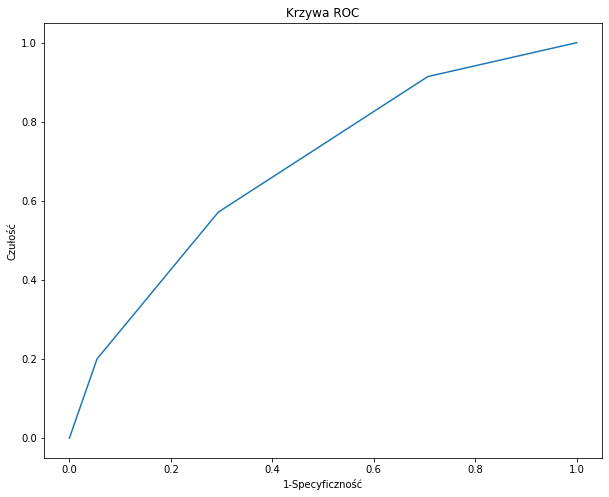

In [3]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


# Utworzenie klasyfikatora.
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean') 

# Wytrenowanie modelu.
classifier.fit(features_train, np.ravel(labels_train))

#Policzenie pola pod krzywą ROC
labels_predicted = classifier.predict(features_test)
auc = metrics.roc_auc_score(labels_test, labels_predicted) 

#Policzenie prawdopodobieństw
target_probabilities = classifier.predict_proba(features_test)[:,1]

#Wyznaczenie danych do krzywej ROC
czulosci, specyficznosci, progi = metrics.roc_curve(labels_test,target_probabilities,pos_label=2)

print("Użyte progi prawdopodobieństwa:",progi)
print("AUC=",auc)


plt.figure(figsize=(10, 8)) #Rozmiary okna z wykresem
plt.plot(czulosci, specyficznosci)
plt.title("Krzywa ROC")
plt.xlabel("1-Specyficzność")
plt.ylabel("Czułość")
plt.show()




# Generowanie decyzji dla nowych obiektów

In [19]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

#Funkcja pomocnicza do formatowania liczb (4 miejsca po przecinku)
def myformat(number):
    return "{0:.4f}".format(float(number))


#Odczytanie tablicy treningowej i testowej
datasetTrain = pd.read_csv('./dane/serce_train.csv')
datasetTest = pd.read_csv('./dane/serce_test.csv')

noColumn = datasetTrain.shape[1]

features_train = datasetTrain.iloc[:,:noColumn-1] #Część warunkowa tablicy treningowej
labels_train = datasetTrain.iloc[:,[noColumn-1]] #Kolumna decyzyjna tablicy treningowej

features_test = datasetTest.iloc[:,:noColumn-1] #Część warunkowa tablicy testowej
labels_test_orig = datasetTest.iloc[:,[noColumn-1]] #Kolumna decyzyjna tablicy testowej

model = KNeighborsClassifier(n_neighbors=3,metric='euclidean') 
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora


labels_predicted = model.predict(features_test) #Testowanie tablicy testowej
vector_labels_test_orig = np.ravel(labels_test_orig)

print("Decyzje wygenerowane:",labels_predicted)
print("Decyzje oryginalne:  ",vector_labels_test_orig)

labels_predicted_proba = model.predict_proba(features_test) #Wyliczenie prawdopodonieństwa poszczególnych decyzji

print("Kolejność klas decyzyjnych:",model.classes_)

for i in range(0,len(labels_predicted_proba)): #Wypisanie prawdopodobieństw dla klas
    p1 = labels_predicted_proba[i][0]
    p2 = labels_predicted_proba[i][1]
    wynik = "sukces"
    if  labels_predicted[i]!=vector_labels_test_orig[i]: wynik = "porażka"
    print("Prawdopodobieństwa:",myformat(p1),myformat(p2),
          "  Oryginalna decyzja:",vector_labels_test_orig[i],"Wygenerowana decyzja:",labels_predicted[i]," - ",wynik)


Decyzje wygenerowane: [2 2 2 2 2 2 1 2 2 1]
Decyzje oryginalne:   [2 1 2 1 1 2 1 1 2 1]
Kolejność klas decyzyjnych: [1 2]
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.0000 1.0000   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.0000 1.0000   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.6667 0.3333   Oryginalna decyzja: 1 Wygenerowana decyzja: 1  -  sukces
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.0000 1.0000   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.6667 0.3333   O

In [ ]:
#Zad 3. Napisz program który odczytuje tablicę danych rezygnacje.csv oraz wybiera z niej wszystkie wiersze oraz
#kolumny: CZAS_POSIADANIA, PLAN_MIEDZY, POCZTA_G, L_WIAD_POCZTA_G, L_POL_BIURO, REZYGN. 
#Następnie wykonuje eksperyment, którego celem jest wygenerowanie wartości decyzji dla obiektów testowych 
#z pliku czy_zrezygnuja.csv. Klasyfikator jest tworzony dla tablicy rezygnacje.csv metodą k-NN z użyciem tych samych 
#parametrów tworzenia jak w powyższym przykładzie i przy atrybucie decyzyjnym 'REZYGN'. 
#Wygenerowane decyzję są dopisywane jako ostatnia kolumna do zbioru odczytanego z pliku czy_zrezygnuja.csv, 
#po czym zmodyfikowany zbiór danych (z dodaną kolumną) jest zapisywany do pliku czy_zrezygnuja_dec.csv.
#UWAGA: W danych z pliku czy_zrezygnuja.csv nie ma atrybutu decyzyjnego.



# Klasyfikator oparty na drzewie decyzyjnym

Klasyfikatory oparte na drzewach są szeroką i popularną rodziną powiązanych ze sobą i pozbawionych
parametrów nadzorowanych metod klasyfikowania i regresji. Podstawą tych klasyfikatorów
jest tak zwane drzewo decyzyjne, w którym zostały połączone serie reguł decyzyjnych, na przykład
„jeśli płeć to mężczyzna, to…”. Otrzymany wynik z grubsza przypomina odwrócone drzewo,
w którym pierwsza reguła decyzyjna znajduje się na górze, a kolejne rozpościerają się poniżej.
W drzewie decyzyjnym każda reguła występuje w węźle decyzyjnym, a reguły tworzą gałęzie prowadzące
do nowych węzłów. Gałąź bez reguły decyzyjnej na końcu nosi nazwę liścia.
Jednym z powodów dużej popularności modeli opartych na drzewie jest łatwość ich interpretacji.
Tak naprawdę drzewo decyzyjne może zostać dosłownie narysowane w jego pełnej postaci, aby w ten sposób przygotować niezwykle intuicyjny model. Z prostych systemów drzew powstały różne rozszerzenia,jak chocby algorytm losowego lasu (patrz dalej).

Klasyfikator drzewa decyzyjnego, realizowany za pomocą klasy `DecisionTreeClassifier`, próbuje wyszukać regułę decyzyjną pozwalającą na największe zmniejszenie niejednorodności w węźle. Wprawdzie istnieje pewna liczba pomiarów niejednorodności, ale domyślnie DecisionTreeClassifier używa wskaźnika Giniego.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [20]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#PARAMETRY TWORZENIA DRZEWA

my_criterion = "gini" #Kryterium podziału węzła drzewa podczas budowy drzewa: 'gini', 'entropy' 

#Maksymalna głebokość drzewa. Wartość None powoduje, że drzewo będzie się rozrastało aż do
#chwili, gdy wszystkie liście będą jednorodne (składające się z obiektów mających taką samą decyzję). 
#Z kolei wartość w postaci liczby całkowitej praktycznie oznacza „przycięcie” drzewa do podanej głębokości
my_max_depth = 5 

#Minimalna liczba obserwacji w węźle, zanim nastąpi jego rozgałęzienie. Jeżeli wartością jest
#liczba całkowita, określa czyste minimum, zaś liczba zmiennoprzecinkowa określa wielkość
#procentową wszystkich obserwacji.
my_min_samples_split = 10 

#Minimalna liczba obserwacji wymaganych do umieszczenia na liściu. Używane są takie same
#argumenty jak w przypadku min_samples_split.
my_min_samples_leaf = 10

#Maksymalna liczba liści.
my_max_leaf_nodes = 30

#Minimalny wymagany spadek niejednorodności (zwieksenie czystości), aby został utworzoby podział węzła
my_min_impurity_decrease = 0.02

#Wprawdzie dobrze jest wiedzieć o istnieniu wymienionych parametrów, ale w większości przypadków
#używane będą tylko max_depth i min_impurity_decrease.

#Utworzenie obiektu przykładowego modelu klasyfikatora (k-NN)
model =  DecisionTreeClassifier(criterion=my_criterion,
                               max_depth=my_max_depth,
                               min_samples_split=my_min_samples_split,                                
                               min_samples_leaf = my_min_samples_leaf,
                               max_leaf_nodes = my_max_leaf_nodes,
                               min_impurity_decrease = my_min_impurity_decrease)

model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) +=========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Dokładnośc klasyfikacji= 0.7222222222222222
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.72      0.83      0.77        92
           2       0.72      0.59      0.65        70

    accuracy                           0.72       162
   macro avg       0.72      0.71      0.71       162
weighted avg       0.72      0.72      0.72       162

====== MACIERZ POMYŁEK (confusion matrix) +=========
[[76 16]
 [29 41]]


### Wizualizacja drzewa decyzyjnego

In [1]:
#Przykład demonstrujący wizualizację drzewa decyzyjnego
#Dla poprawnego działania tego przykładu należy:
# - zainstalować program Graphviz ze strony: https://graphviz.gitlab.io/download/
# - zainstalowac pakiet graphviz  
    
    
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import pandas as pd
import numpy as np
from io import StringIO
import pydotplus
from sklearn import tree
import os
from IPython.display import IFrame

dataset = pd.read_csv('./dane/serce.csv')
noColumn = dataset.shape[1]
maximal_depth = 3

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

#print(features.head())
#print(labels.head())

features_names = list(features)

#Pozyskiwanie wartości decyzji
class_names_ordered = sorted(np.unique(labels))
my_class_names = []
for i in range(0,len(class_names_ordered)):
    my_class_names.append(str(class_names_ordered[i]))

clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth=maximal_depth, min_samples_leaf=5, class_weight="balanced")
clf.fit(features, labels)


#Generowanie wizualizacji drzewa
dot_data = StringIO()
tree.export_graphviz(
    decision_tree=clf,
    out_file=dot_data,
    feature_names=features_names,
    class_names=my_class_names,
    filled=True,
    rounded=True,
    impurity=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_pdf('serce1.pdf') #Zapis drzewa na dysk
IFrame("serce1.pdf", width=900, height=800) #Otwarcie drzewa w przeglądarce

#Tak mozna na lokalnym komputerze
#os.startfile('serce1.pdf') #Otwarcie drzewa w standardowej przeglądarce do PDF-ów


# Naiwny klasyfikator bayesowski

Metody probabilistyczne klasyfikacji obiektów można przedstawić za pomocą następującego schematu ogólnego:

1. Dla danego obiektu o mającego wartości atrybutów warunkowych równe a1 = v1, ... , an = vn, oszacuj prawdopodobieństwa Pi, że obiekt ten przynależy do klasy decyzyjnej di.

2. Wybierz największą wartość Pmax spośród tych prawdopodobieństw.

3. Przypisz obiektowi o klasę decyzyjną dmax odpowiadającą prawdopodobieństwu Pmax.


Przykładem takiego algorytmu jest klasyfikator bayesowski. Jeśli mamy tablicę decyzyjną T mająca atrybuty warunkowe $a_1$,.., $a_m$ i decyzyjny $d$ z wartościami $d_1$,..., $d_k$, to prawdopodobieństwo, że obiekt testowy $u=(u_1,...,u_m)$ należy do klasy decyyzjnej $d_i$ na podstawie twierdzenia Bayesa wyraża się wzorem:

$$P(d_i|u_1,...,u_m) = \frac{P(u_1,...,u_m|d_i) \cdot P(d_i)}{P(u_1,...,u_m)}$$

gdzie:

- $P(u_1,...,u_m|d_i)$ to prawdopodobięństwo, że w przypadku, gdy wartości atrybutów 
$a_1$,.., $a_m$ mają wartości $u_1,...,u_m$, to wartośc decyzji jest $d_i$,

- $P(d_i)$ to prawdopodobieństwo znalezienia w T obiektu z klasy decyzyjnej $d_i$,

- $P(u_1,...,u_m)$ to prawdopodobieństwo znalezienia w T obiektu, że wartości atrybutów 
$a_1$,.., $a_m$ dla tego obiektu mają wartości $u_1,...,u_m$.

Jeśli chodzi o występujące w mianowniku prawdopodobieństwo  $P(u_1,...,u_m)$, to dla ustalonego obiektu testowego jest
ono stałe przy rozważaniu różnych klas decyzyjnych. Dlatego w dalszych rozważaniach dotyczących budowy klasyfikatora możemy je pominąć. 

Ponadto, omawiana metoda tworzenia klasyfikatora zakłada brak zależności pomiędzy atrybutami warunkowymi. 
Dlatego, korzystając ze wzoru na prawdopodobieństwo zdrzeń niezależnych, powyższy wzór można zapisac jako: 

$$P(d_i|u_1,...,u_m) = P(d_i) \cdot \prod_{i=1}^{m} P(u_i|d_i)$$

Wielkość klas decyzyjnych w danych treningowych jest stała. Zatem dla wyznaczenia wartości decyzji dla obiektu testowego trzeba wyznaczyc $m$ prawdopodobieństw związanych z wartościmi atrybutów warunkowych obiektu testowego.

Dla policzenia tego prawdopodonięństwa dla każdej cechy w danych trzeba przyjąć założenie o rozkładzie statystycznym prawdopodobieństwa $P(u_i|d_i)$. Najczęściej spotykane rodzaje rozkładów to Gaussowski dla przypadku atrybutów ciągłych (atrybuty numeryczne) i wielomianowy dla przypadku atrybutów o wartościach dyskretnych (atrybuty symboliczne).


##  Naiwny klasyfikator bayesowski Gaussa (dla cech ciągłych)

Najczęściej spotykany rodzaj naiwnego klasyfikatora bayesowskiego to naiwny klasyfikator bayesowski
Gaussa. W tym klasyfikatorze przyjmowane jest założenie, że prawdopodobieństwo $P(u_i|d_i$ można określić za pomocą rozkładu normalnego. Dlatego naiwny klasyfikator bayesowski Gaussa sprawdza się najlepiej w przypadkach, w których
wszystkie cechy są ciągłe.

Jednym z ciekawszych aspektów naiwnego klasyfikatora bayesowskiego Gaussa jest to, że pozwala on
na wykorzystanie wcześniejszego przekonania dotyczącego klasy docelowej. To wymaga użycia parametru
*priors* egzemplarza klasy `GaussianNB`, który pobiera listę prawdopodobieństwa przypisanego poszczególnym
klasom wektora docelowego.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [22]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


model = GaussianNB() #Wersja bez przekonania dotyczącego klasy docelowej

#priors=[0.25,0.75] #Wersja z przekonaniem dotyczącym klasy docelowej
#model = GaussianNB(priors)

model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )



Dokładnośc klasyfikacji= 0.8518518518518519
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        92
           2       0.85      0.80      0.82        70

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162



## Wielomianowy naiwny klasyfikator bayesowski

Wielomianowy naiwny klasyfikator bayesowski działa podobnie jak gaussowski, ale przyjmuje się założenie
o wielomianowym rozkładzie cech. W praktyce oznacza to, że omawiany klasyfikator jest
powszechnie stosowany w przypadku atrybutów dyskretnych

Podobnie jak w przypadku klasyfikatora bayesowskiego Gaussa, także można wykorzystywać wcześniejsze przekonanie dotyczące klasy docelowej, co wymaga użycia parametru *class_prior*, który pobiera listę prawdopodobieństwa przypisanego poszczególnym klasom wektora docelowego.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


In [12]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


model = MultinomialNB()
#model = MultinomialNB(class_prior=[0.25, 0.5])

model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 

print("Dokładność klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )


Dokładność klasyfikacji= 0.7469135802469136
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.79      0.76      0.77        92
           2       0.70      0.73      0.71        70

    accuracy                           0.75       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.75      0.75      0.75       162



# Porównanie działania klasyfikatorów tworzonych czterema metodami dla ustalonego zestawu parametrów

In [13]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB

from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Ignorowanie ostrzeżeń

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

#Podział tablicy na część treningową i testową
data = train_test_split(features, labels, test_size=0.6, random_state=12345)
features_train = data[0]
features_test = data[1]
labels_train = data[2]
labels_test = data[3]

#========DEFINIOWANIE MODELI i ich nazw ===============

models = []
modelNameList = []

#Klasyfikator k najbliższych sąsiadów
model = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')
models.append(model)
modelNameList.append("KNN")

#Naiwny Bayes traktujący atrybuty jako atrybuty z ciągłymi wartościami (dobry dla numerycznych)
model = GaussianNB()
models.append(model)
modelNameList.append("GaussianNB")

#Naiwny Bayes traktujący atrybuty jako atrybuty z dyskretnymi wartościami (dobry dla symbolicznych)
model = BernoulliNB()
models.append(model)
modelNameList.append("BernoulliNB")

#Drzewo decyzyjne
model = tree.DecisionTreeClassifier(max_depth=5)
models.append(model)
modelNameList.append("DecisionTree")


#===========================================

results = []
#Testowanie wszystkich klasyfikatorów
for i in range(0,len(models)):
    model = models[i]
    model.fit(features_train, np.ravel(labels_train))
    labels_predicted = model.predict(features_test)
    accuracy = metrics.accuracy_score(labels_test, labels_predicted)    
    locList = []; locList.append(accuracy); locList.append(modelNameList[i])
    results.append(locList)

def myFunc(result):
    return result[0]  #Funkcja porównuje według accuracy

#Sortowanie wyników
results.sort(reverse=True, key=myFunc)

#Wypisanie posortowanych wyników
for i in range(0,len(results)):
    result = results[i]
    print(str(i+1)+".",result[0],result[1])



1. 0.845679012345679 GaussianNB
2. 0.7962962962962963 BernoulliNB
3. 0.7654320987654321 DecisionTree
4. 0.6728395061728395 KNN


In [ ]:
#Zad 4. Napisz program który odczytuje tablicę danych rezygnacje.csv oraz wybiera z niej wszystkie wiersze oraz
#kolumny: CZAS_POSIADANIA, PLAN_MIEDZY, POCZTA_G, L_WIAD_POCZTA_G, L_POL_BIURO, REZYGN. 
#Następnie wykonuje szereg eksperymentów tak jak w poprzednim przykładzie celem ustalenia który klasyfikator 
#uzyskuje najlepsze wyniki. Poeksperymentować trochę z parametrami tych 4 klasyfikatorów, aby uzyskać lepszą jakość
#klasyfikacji. Wykonać wykres porównujący jakości klasyfikacji (accuracy) dla wszystkich 4 klasyfikatorów 
#i wyciągnąć wniosek który klasyfikator jest najlepszy.
#Wygenerować krzywe ROC dla wszystkich 4 klasyfikatorów. 
#Czy rankingi klasyfikatorów z punktu wudzenia accuracy oraz AUC pokrywają się?
#Odpowiedni wniosek zapisać słownie w komentarzu na końcu komórki z rozwiązaniem.
#Sprawdzić czy dodanie innych atrybutów warunkowych, które zostały wcześniej usunięte, poprawi jakość klasyfikatorów.
#Odpowiedni wniosek na ten temat także zapisać słownie w komentarzu na końcu komórki z rozwiązaniem.



In [ ]:
#Zad 5. Pewien bank zgromadził dane o kredytach, które oferował swoim klientom oraz informacje czy każdy z tych 
#kredytów był dobrym kredytem dla banku (klient spłacił kredyt) lub złym kredytem dla banku (klient nie spłacił 
#kredytu).  Dane te mają posłużyć do automatycznego  wspomagania podejmowania decyzji w zakresie przyznawania 
#kredytów nowym klientom za pomocą klasyfikatorów. W celu przeprowadzenia testu efektywności wybranych 
#klasyfikatorów metodą train&test dane podzielono na dwie części, które są dostępne w plikach w formacie CSV: 
# dz1_train.csv i dz1_test.csv. 
#
#Przeprowadzić test tablicy dz1_test.csv metodą train&test dla następujących klasyfikatorów:
#
#1. klasyfikator oparty na metodzie k-NN biorący pod uwage 5 najbliższych sąsiadów i metrykę euklidesową,
#
#2. klasyfikator oparty na drzewie decyzyjnym skonstruowanym według miary entropijnej podziału węzła, 
# maksymalną głebokością drzewa równą 6 i minimalnym wymaganym spadkiem niejednorodności równym 0.01 
# (pozostałe parametry na ustawieniach standardowych).
#
#Wypisać dokładność klasyfikacji obydwu klasyfikatorów (accuracy) dla całej tablicy testowej oraz 
#dla obydwu klas decyzyjnych z osobna (recall) (jest to 6 liczb).
#
#Wyniki i odpowiednie wnioski na temat porównania klasyfikatorów odnośnie ich jakości zapisać w komentarzu na 
#końcu komórki z rozwiązaniem.


In [ ]:
#Zad 6. Wyznaczyć jakość dwóch klasyfikatorów wyznaczonych w poprzednim kroku poprzez wyliczenie ich kosztów 
#marketingowych  błędnie podjętych decyzji przez program dla tablicy dz1_test.csv. 
#Jeśli mamy dwie wartości decyzji: 1 (decyzja pozytywna - dobry kredyt) i 0 (decyzja negatywna - zły kredyt), 
#to przy klasyfikacji obiektu testowego możliwe są 4 następujące przypadki:
#
#1. Prawdziwa klasyfikacja negatywna – nie przyznajemy kredytu i jest to decyzja poprawna, bo klient i tak by go 
# nie spłacił (koszt=0).
#
#2. Prawdziwa klasyfikacja pozytywna – przyznajemy kredyt i jest to decyzja poprawna bo klient go spłaci (koszt=0).
#
#3. Fałszywa klasyfikacja negatywna – nie przyznajemy kredytu (klasyfikator wygenerował 0), ale nie jest to decyzja 
# poprawna, bo klient spłaciłby kredyt (koszt=1).
#
#4. Fałszywa klasyfikacja pozytywna – przyznajemy kredyt (klasyfikator wygenerował 1), ale nie jest to decyzja poprawna,
# bo ten klient nie spłaci kredytu (koszt=5)
#
#Zauważmy, że koszt fałszywej klasyfikacji pozytywnej jest wyższy od kosztu fałszywej klasyfikacji negatywnej, 
#gdyż w przypadku fałszywej klasyfikacji pozytywnej bank więcej straci ponosząc koszty zajmowania się nie spłaconym 
#kredytem (np. koszty wynajęcia firmy w celu przeprowadzenia egzekucji komorniczej). Sumaryczny koszt marketingowy 
#dla całej próbki testowej jest po prostu sumą kosztów marketingowych poniesionych dla wszystkich obiektów testowych. 
#Dany klasyfikator jest lepszy, gdy ma mniejszy sumaryczny koszt marketingowy.  Podaj sumaryczne koszty marketingowe 
#dla dwóch wymienionych wyżej klasyfikatorów.
#
#Wyniki i odpowiednie wnioski zapisać w komentarzu na końcu komórki z rozwiązaniem.

